<a href="https://colab.research.google.com/github/carolinagarcias/Carolina-s_Portafolio/blob/main/Netflix_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>[Netflix catalog analysis](#scrollTo=0bc-J4Y48RkG)

>>[Carga de datos](#scrollTo=RzO8w1ysoR5P)

>>>>[Importamos las librerias y montamos el drive de google](#scrollTo=YFgb9nz521-f)

>>>>[Cargamos el df usando la url brindado en la consigna con los siguiente parámetros](#scrollTo=xh8NUrIN3ADP)

>>[Insertado de datos](#scrollTo=3FJW88WN-cL0)

>>[Limpieza de datos](#scrollTo=KAjjl-EDoYZ_)

>>>>[Descripción del Dataset](#scrollTo=HkzlxL-sZj7_)

>>>>[Identificación de los NaN](#scrollTo=wbIa-QbBsm-m)

>>>>>>[a. En los campos country, cast, director reemplazamos los valores NaN con una cadena 'No Data', al ser un dato categórico decidimos reemplazarlo con un string que nos permita evaluarlo al momento de realizar las visualizaciones.](#scrollTo=2Njv98dBs54e)

>>>>>>[b. Tratamiento de NaN del campo duration](#scrollTo=7tLucEsNeVMm)

>>>>[Identificamos varias Peliculas con más de una entrada en el dataset original](#scrollTo=iTlGlApkX47X)

>>[Transformación de Datos](#scrollTo=A_RfQNINQ6ru)

>>>>[Tratamiento de las columnas con varios elementos](#scrollTo=GK9-GW3eJVfn)

>>>>[Creamos un df para películas](#scrollTo=erVzimcbdZXW)

>>>>[Creamos un df para series de TV](#scrollTo=3qxRkeNxf5iB)

>[Análisis y Visualizaciones](#scrollTo=mojtJzQTngJZ)

>>>>[Tabla según el tipo de producto](#scrollTo=Jforgg4Irt5i)

>>>>[Evaluación de géneros  en el dataset](#scrollTo=YbFaCAEdlv8U)

>>>>[Evaluación del total de peliculas y series en el dataset a lo largo de lo años](#scrollTo=zHlIT1AJmzUT)

>>>>[Evaluación del total de peliculas y series en el dataset según el año de producción del producto (release_year)](#scrollTo=CKNBZCdqsHoR)

>>>>[Duración de peliculas por genero](#scrollTo=K36GIDerqsmC)

>>>>[Géneros mas representativos en lo últimos 5 años](#scrollTo=5f6owHKoJTIC)

>>[Conclusión](#scrollTo=q7ppUWSYpA7A)

>>[Almacenamiento de resultados](#scrollTo=4nsbdrUgpL4k)



# Netflix catalog analysis

---








## Carga de datos


#### 1. Importamos las librerias y montamos el drive de google

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from google.colab import drive
#drive.mount('/content/mi_drive')


#### 2. Cargamos el df usando la url brindado en la consigna con los siguiente parámetros
- `sep (',')`
- `skiprow = 23`, ya que las primeras 23 lineas del csv contiene información no válida. (Se deja constancia de que se habia identificado al De Lorean)
- `parse_dates=['date_added']` formateamos a fecha desde el inicio el campo 'date_added'

In [ ]:
url_netflix='https://raw.githubusercontent.com/al34n1x/DataScience/master/100.Examen/2022/netflix_titles.csv'
df_raw = pd.read_csv(url_netflix, sep=',',skiprows=23, parse_dates=['date_added'])
df_raw.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


---
## Insertado de datos


Creamos un diccionario con 10 entradas en el mismo formato que el dataframe

In [ ]:
new_dic = {'cast': {
  0: 'CROMBERG JAVIER EUGENIO, CRUZ PINEDA FABIAN, GARCIA CAROLINA, GIULIANO AUGUSTO, INZA ROBERTO, URRACO EZEQUIEL',
  1: 'CROMBERG JAVIER EUGENIO, CRUZ PINEDA FABIAN, GARCIA CAROLINA, GIULIANO AUGUSTO, INZA ROBERTO, URRACO EZEQUIEL',
  2: 'CROMBERG JAVIER EUGENIO, CRUZ PINEDA FABIAN, GARCIA CAROLINA, GIULIANO AUGUSTO, INZA ROBERTO, URRACO EZEQUIEL', 
  3: 'CROMBERG JAVIER EUGENIO, CRUZ PINEDA FABIAN, GARCIA CAROLINA, GIULIANO AUGUSTO, INZA ROBERTO, URRACO EZEQUIEL', 
  4: 'CROMBERG JAVIER EUGENIO, CRUZ PINEDA FABIAN, GARCIA CAROLINA, GIULIANO AUGUSTO, INZA ROBERTO, URRACO EZEQUIEL', 
  5: 'CROMBERG JAVIER EUGENIO, CRUZ PINEDA FABIAN, GARCIA CAROLINA, GIULIANO AUGUSTO, INZA ROBERTO, URRACO EZEQUIEL', 
  6: 'CROMBERG JAVIER EUGENIO, CRUZ PINEDA FABIAN, GARCIA CAROLINA, GIULIANO AUGUSTO, INZA ROBERTO, URRACO EZEQUIEL',
  7: 'CROMBERG JAVIER EUGENIO, CRUZ PINEDA FABIAN, GARCIA CAROLINA, GIULIANO AUGUSTO, INZA ROBERTO, URRACO EZEQUIEL',
  8: 'CROMBERG JAVIER EUGENIO, CRUZ PINEDA FABIAN, GARCIA CAROLINA, GIULIANO AUGUSTO, INZA ROBERTO, URRACO EZEQUIEL',
  9: 'CROMBERG JAVIER EUGENIO, CRUZ PINEDA FABIAN, GARCIA CAROLINA, GIULIANO AUGUSTO, INZA ROBERTO, URRACO EZEQUIEL'
  },
 'country': {
  0: 'United States',
  1: 'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
  2: 'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
  3: 'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
  4: 'India',
  5: 'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
  6: 'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
  7: 'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
  8: 'United Kingdom',
  9: 'United States'},
 'date_added': {
  0: pd.Timestamp('2022-05-06 00:00:00'),
  1: pd.Timestamp('2022-05-06 00:00:00'),
  2: pd.Timestamp('2022-05-06 00:00:00'),
  3: pd.Timestamp('2022-05-06 00:00:00'),
  4: pd.Timestamp('2022-05-06 00:00:00'),
  5: pd.Timestamp('2022-05-06 00:00:00'),
  6: pd.Timestamp('2022-05-06 00:00:00'),
  7: pd.Timestamp('2022-05-06 00:00:00'),
  8: pd.Timestamp('2022-05-06 00:00:00'),
  9: pd.Timestamp('2022-05-06 00:00:00')},
 'director': {
  0: 'CROMBERG JAVIER EUGENIO, CRUZ PINEDA FABIAN, GARCIA CAROLINA, GIULIANO AUGUSTO, INZA ROBERTO, URRACO EZEQUIEL',
  1: 'CROMBERG JAVIER EUGENIO, CRUZ PINEDA FABIAN, GARCIA CAROLINA, GIULIANO AUGUSTO, INZA ROBERTO, URRACO EZEQUIEL',
  2: 'CROMBERG JAVIER EUGENIO, CRUZ PINEDA FABIAN, GARCIA CAROLINA, GIULIANO AUGUSTO, INZA ROBERTO, URRACO EZEQUIEL', 
  3: 'CROMBERG JAVIER EUGENIO, CRUZ PINEDA FABIAN, GARCIA CAROLINA, GIULIANO AUGUSTO, INZA ROBERTO, URRACO EZEQUIEL', 
  4: 'CROMBERG JAVIER EUGENIO, CRUZ PINEDA FABIAN, GARCIA CAROLINA, GIULIANO AUGUSTO, INZA ROBERTO, URRACO EZEQUIEL', 
  5: 'CROMBERG JAVIER EUGENIO, CRUZ PINEDA FABIAN, GARCIA CAROLINA, GIULIANO AUGUSTO, INZA ROBERTO, URRACO EZEQUIEL', 
  6: 'CROMBERG JAVIER EUGENIO, CRUZ PINEDA FABIAN, GARCIA CAROLINA, GIULIANO AUGUSTO, INZA ROBERTO, URRACO EZEQUIEL',
  7: 'CROMBERG JAVIER EUGENIO, CRUZ PINEDA FABIAN, GARCIA CAROLINA, GIULIANO AUGUSTO, INZA ROBERTO, URRACO EZEQUIEL',
  8: 'CROMBERG JAVIER EUGENIO, CRUZ PINEDA FABIAN, GARCIA CAROLINA, GIULIANO AUGUSTO, INZA ROBERTO, URRACO EZEQUIEL',
  9: 'CROMBERG JAVIER EUGENIO, CRUZ PINEDA FABIAN, GARCIA CAROLINA, GIULIANO AUGUSTO, INZA ROBERTO, URRACO EZEQUIEL'
  },
 'duration': {0: '90 min',
  1: '2 Seasons',
  2: '1 Season',
  3: '1 Season',
  4: '2 Seasons',
  5: '1 Season',
  6: '91 min',
  7: '125 min',
  8: '9 Seasons',
  9: '104 min'},
 'listed_in': {0: 'Documentaries',
  1: 'International TV Shows, TV Dramas, TV Mysteries',
  2: 'Crime TV Shows, International TV Shows, TV Action & Adventure',
  3: 'Docuseries, Reality TV',
  4: 'International TV Shows, Romantic TV Shows, TV Comedies',
  5: 'TV Dramas, TV Horror, TV Mysteries',
  6: 'Children & Family Movies',
  7: 'Dramas, Independent Movies, International Movies',
  8: 'British TV Shows, Reality TV',
  9: 'Comedies, Dramas'},
 'rating': {0: 'PG-13',
  1: 'TV-MA',
  2: 'TV-MA',
  3: 'TV-MA',
  4: 'TV-MA',
  5: 'TV-MA',
  6: 'PG',
  7: 'TV-MA',
  8: 'TV-14',
  9: 'PG-13'},
 'release_year': {0: 2020,
  1: 2021,
  2: 2021,
  3: 2021,
  4: 2021,
  5: 2021,
  6: 2021,
  7: 1993,
  8: 2021,
  9: 2021},
 'show_id': { # de esta forma las rows nuevas siempre van a tener un id correcto
  0: 's' + str(len(df_raw)+1),
  1: 's' + str(len(df_raw)+2),
  2: 's' + str(len(df_raw)+3),
  3: 's' + str(len(df_raw)+4),
  4: 's' + str(len(df_raw)+5),
  5: 's' + str(len(df_raw)+6),
  6: 's' + str(len(df_raw)+7),
  7: 's' + str(len(df_raw)+8),
  8: 's' + str(len(df_raw)+9),
  9: 's' + str(len(df_raw)+10)},
 'title': {         
  0: 'Star Wars - The Revenge of the Jedi',
  1: 'Tremors 8 - For some reason we keep making this',
  2: 'Evil Dead - Remaster Remake Redux',
  3: 'Blade Runner 2050 - Foggier Than Ever',
  4: 'Mandy 2',
  5: 'Hereditary Reloaded',
  6: 'The Thing - We did it again!',
  7: 'The Shining - Attack of the Clones',
  8: 'Citizen Kane - Mas rapido mas furioso',
  9: 'Dr. Strange or: How I Learned to Stop Worrying and Love the Bomb'},
 'type': {0: 'Movie',
  1: 'TV Show',
  2: 'TV Show',
  3: 'TV Show',
  4: 'TV Show',
  5: 'TV Show',
  6: 'Movie',
  7: 'Movie',
  8: 'TV Show',
  9: 'Movie'}}

Convertimos cada row del diccionario a una series de pandas para poder crear un dataframe nuevo y concatenamos ese dataframe con `df_raw` para añadir las nuevas entries

In [ ]:
df_raw = pd.concat([df_raw,pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in new_dic.items() ]))])

In [ ]:
df_raw = df_raw.reset_index(drop=True) # reseteamos los indices para  que se reflejen los nuevos entries

In [ ]:
df_raw.tail(11)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8807,s8808,Movie,Star Wars - The Revenge of the Jedi,"CROMBERG JAVIER EUGENIO, CRUZ PINEDA FABIAN, G...","CROMBERG JAVIER EUGENIO, CRUZ PINEDA FABIAN, G...",United States,2022-05-06,2020,PG-13,90 min,Documentaries,NaN
8808,s8809,TV Show,Tremors 8 - For some reason we keep making this,"CROMBERG JAVIER EUGENIO, CRUZ PINEDA FABIAN, G...","CROMBERG JAVIER EUGENIO, CRUZ PINEDA FABIAN, G...","United States, Ghana, Burkina Faso, United Kin...",2022-05-06,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",NaN
8809,s8810,TV Show,Evil Dead - Remaster Remake Redux,"CROMBERG JAVIER EUGENIO, CRUZ PINEDA FABIAN, G...","CROMBERG JAVIER EUGENIO, CRUZ PINEDA FABIAN, G...","United States, Ghana, Burkina Faso, United Kin...",2022-05-06,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",NaN
8810,s8811,TV Show,Blade Runner 2050 - Foggier Than Ever,"CROMBERG JAVIER EUGENIO, CRUZ PINEDA FABIAN, G...","CROMBERG JAVIER EUGENIO, CRUZ PINEDA FABIAN, G...","United States, Ghana, Burkina Faso, United Kin...",2022-05-06,2021,TV-MA,1 Season,"Docuseries, Reality TV",NaN
8811,s8812,TV Show,Mandy 2,"CROMBERG JAVIER EUGENIO, CRUZ PINEDA FABIAN, G...","CROMBERG JAVIER EUGENIO, CRUZ PINEDA FABIAN, G...",India,2022-05-06,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",NaN
8812,s8813,TV Show,Hereditary Reloaded,"CROMBERG JAVIER EUGENIO, CRUZ PINEDA FABIAN, G...","CROMBERG JAVIER EUGENIO, CRUZ PINEDA FABIAN, G...","United States, Ghana, Burkina Faso, United Kin...",2022-05-06,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",NaN
8813,s8814,Movie,The Thing - We did it again!,"CROMBERG JAVIER EUGENIO, CRUZ PINEDA FABIAN, G...","CROMBERG JAVIER EUGENIO, CRUZ PINEDA FABIAN, G...","United States, Ghana, Burkina Faso, United Kin...",2022-05-06,2021,PG,91 min,Children & Family Movies,NaN
8814,s8815,Movie,The Shining - Attack of the Clones,"CROMBERG JAVIER EUGENIO, CRUZ PINEDA FABIAN, G...","CROMBERG JAVIER EUGENIO, CRUZ PINEDA FABIAN, G...","United States, Ghana, Burkina Faso, United Kin...",2022-05-06,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",NaN
8815,s8816,TV Show,Citizen Kane - Mas rapido mas furioso,"CROMBERG JAVIER EUGENIO, CRUZ PINEDA FABIAN, G...","CROMBERG JAVIER EUGENIO, CRUZ PINEDA FABIAN, G...",United Kingdom,2022-05-06,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",NaN


---
## Limpieza de datos

#### 1. Descripción del Dataset

El presente Dataset consta de 12 columnas:


index | Nombre y Apellido | Non-Null Count | tipo
--|-------------------|----|-----
 0  | show_id  |  8807 non-null |  object        
 1  | type     |  8807 non-null |  object        
 2  | title    |  8807 non-null |  object        
 3  | director  |  6173 non-null |  object        
 4  | cast      |  7982 non-null |  object        
 5  | country   |  7976 non-null |  object        
 6  | date_added |  8797 non-null |  datetime64[ns]
 7  | release_year |  8807 non-null |  int64         
 8  | rating    |  8803 non-null |  object        
 9  | duration  |  8804 non-null |  object        
 10 | listed_in |  8807 non-null |  object        
 11 | description |  8807 non-null |  object    

 Decsripción de los campos 

index | Nombre | Descripcion
--|---------|--------------
  0 | show_id | id de la fila
  1 | type | tiene dos valores ('Movies' y 'TV Show') categoriza el producto en dos es decir si es una película o una serie de TV
  2 | title | campo con el título de la película
  3 | director | campo con el director de la película con tiene 2634 valores nulos
  4 | cast | campo con los actores de la película, contiene 284 valores nulos        
  5 | country | contiene los paises (en un máximo de tres) en los que fue estrenada la películo o serie de TV. Contiene 831 valores nulos
  6 | date_added | importada en formato `datetime64` contiene 10 valores nulos
  7 | release_year | año de producción del prodcuto         
  8 | rating | es la calificación recomendada para el público seleccionado (como seria apta para todo público, etc). Contien 4 valores nulos
  9 | duration | las películas estan en minutos y las series de TV en temporadas ('Seasons')
  10 |listed_in | tiene hasta tres palabras claves para los géneros. No contiene valores nulos        
  11 | description | es un campo de texto con una descripción mínima del producto. No contiene campos nulos.

#### 2. Identificación de los NaN
- Creamos una copia del df 
- Identificamos los campos con mayor cantidad de NaN

In [ ]:
df_raw2 = df_raw
df_raw2.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description       10
dtype: int64

###### a. En los campos `country`, `cast`, `director` reemplazamos los valores NaN con una cadena 'No Data', al ser un dato categórico decidimos reemplazarlo con un string que nos permita evaluarlo al momento de realizar las visualizaciones.

In [ ]:
df_raw2['country'].replace(np.nan, 'No Data',inplace  = True)
df_raw2['cast'].replace(np.nan, 'No Data',inplace  = True)
df_raw2['director'].replace(np.nan, 'No Data',inplace  = True)

###### b. Tratamiento de NaN del campo `duration`

Identificamos tres datos faltantes en la columna `duration`, los cuales  figuran en el campo `rating` como el tiempo en 'min' de tres películas. Presentamos una lista de valores únicos del campo `rating` en donde se ven tres valores en 'min' y otro nan.


In [ ]:
df_raw2['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

Visualizamos los registros a tratar

In [ ]:
df_raw2[['rating', 'duration', 'type', 'title']][(df_raw2['rating'] == '66 min') | (df_raw2['rating'] == '74 min') | (df_raw2['rating'] == '84 min')]

,rating,duration,type,title
5541,74 min,NaN,Movie,Louis C.K. 2017
5794,84 min,NaN,Movie,Louis C.K.: Hilarious
5813,66 min,NaN,Movie,Louis C.K.: Live at the Comedy Store


Recorremos el campo rating en la búsqueda del string 'min' y lo reemplazamos en la columna `duration`

In [ ]:
for i in df_raw2['rating']:
  if 'min' in str(i):
    df_raw2["duration"] = np.where(df_raw2["rating"] == i, i, df_raw2['duration'])

Confirmamos el cambio en los mencionados registros y en el box siguiente que no haya modificado el df


In [ ]:
df_raw2[['rating', 'duration', 'type', 'title']][(df_raw2['rating'] == '66 min') | (df_raw2['rating'] == '74 min') | (df_raw2['rating'] == '84 min')]

,rating,duration,type,title
5541,74 min,74 min,Movie,Louis C.K. 2017
5794,84 min,84 min,Movie,Louis C.K.: Hilarious
5813,66 min,66 min,Movie,Louis C.K.: Live at the Comedy Store


Confirmamos la ausencia de Nan en duration

In [ ]:
df_raw2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8817 entries, 0 to 8816
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8817 non-null   object        
 1   type          8817 non-null   object        
 2   title         8817 non-null   object        
 3   director      8817 non-null   object        
 4   cast          8817 non-null   object        
 5   country       8817 non-null   object        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8817 non-null   int64         
 8   rating        8813 non-null   object        
 9   duration      8817 non-null   object        
 10  listed_in     8817 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 826.7+ KB


c. Limpiamos los datos del campo `rating` 

Primero modificamos los valores erróneos de `rating` a 'No Data'

In [ ]:
for i in df_raw2['rating']:
  if 'min' in str(i):
    df_raw2["rating"] = np.where(df_raw2["rating"] == i, 'No Data', df_raw2['rating'])

Luego tratamos los NaN de `rating` también a 'No Data' y mostramos una lista de valores únicos de control.

In [ ]:
df_raw2['rating'].replace(np.nan, 'No Data',inplace  = True)

In [ ]:
df_raw2['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'No Data', 'NR', 'TV-Y7-FV', 'UR'],
      dtype=object)

d. Al finalizar la limpieza de los datos vemos que se pudieron tratar todos los datos salvo la columna `date_added` con 10 registros NaN 

In [ ]:
df_raw2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8817 entries, 0 to 8816
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8817 non-null   object        
 1   type          8817 non-null   object        
 2   title         8817 non-null   object        
 3   director      8817 non-null   object        
 4   cast          8817 non-null   object        
 5   country       8817 non-null   object        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8817 non-null   int64         
 8   rating        8817 non-null   object        
 9   duration      8817 non-null   object        
 10  listed_in     8817 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 826.7+ KB



#### 3. Identificamos varias Peliculas con más de una entrada en el dataset original


Analizando la descripcion de las peliculas, encontramos varios registros duplicados y revisando los nombres de peliculas asociados, vemos que tienen el mismo nombre pero con una observacion incluida.

Visualización de la cantidad de peliculas con la misma descripción en `description`. 

In [ ]:
df_raw_descr = df_raw[['description','title']].groupby('description').count()
df_raw_descr2 = df_raw_descr.sort_values(by = ['title'], ascending=False)
df_raw_descr2

,title
description,
"Paranormal activity at a lush, abandoned property alarms a group eager to redevelop the site, but the eerie events may not be as unearthly as they think.",4
"Multiple women report their husbands as missing but when it appears they are looking for the same man, a police officer traces their cryptic connection.",3
A surly septuagenarian gets another chance at her 20s after having her photo snapped at a studio that magically takes 50 years off her life.,3
"Challenged to compose 100 songs before he can marry the girl he loves, a tortured but passionate singer-songwriter embarks on a poignant musical journey.",3
The Great Dog Demon beaqueathed one of the Three Swords of the Fang to each of his two sons. Now the evil power of the third sword has been awakened.,2
...,...
"Captain Atomic – once a superhero, now a sock puppet – can only activate his powers with the help of Joey, his new partner and biggest fan.",1
"Capt. Archer and his crew explore space and discover human innovation-expanding technologies as they meet new alien races in this ""Star Trek"" prequel.",1
Cameras following Bengaluru police on the job offer a rare glimpse into the complex and challenging inner workings of four major crime investigations.,1


Visualizamos las filas y observamos que los `títulos` y `show_id` son diferentes

In [ ]:
df_raw_descr3 = df_raw.query('description=="Paranormal activity at a lush, abandoned property alarms a group eager to redevelop the site, but the eerie events may not be as unearthly as they think."')
df_raw_descr3

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
236,s237,Movie,Boomika,Rathindran R Prasad,"Aishwarya Rajesh, Vidhu, Surya Ganapathy, Madh...",No Data,2021-08-23,2021,TV-14,122 min,"Horror Movies, International Movies, Thrillers","Paranormal activity at a lush, abandoned prope..."
237,s238,Movie,Boomika (Hindi),Rathindran R Prasad,"Aishwarya Rajesh, Vidhu, Surya Ganapathy, Madh...",No Data,2021-08-23,2021,TV-14,122 min,"Horror Movies, International Movies, Thrillers","Paranormal activity at a lush, abandoned prope..."
238,s239,Movie,Boomika (Malayalam),Rathindran R Prasad,"Aishwarya Rajesh, Vidhu, Surya Ganapathy, Madh...",No Data,2021-08-23,2021,TV-14,122 min,"Horror Movies, International Movies, Thrillers","Paranormal activity at a lush, abandoned prope..."
239,s240,Movie,Boomika (Telugu),Rathindran R Prasad,"Aishwarya Rajesh, Vidhu, Surya Ganapathy, Madh...",No Data,2021-08-23,2021,TV-14,122 min,"Horror Movies, International Movies, Thrillers","Paranormal activity at a lush, abandoned prope..."


Observación: Haciendo una investigación en la web vimos que corresponde a distintas versiones en idiomas diferentes y que al tener distinto código de `show_id` se conservaron los registros.

---
## Transformación de Datos

#### 1. Tratamiento de las columnas con varios elementos

Los siguientes campos tienen varios elementos contenidos en el mismo. 
- `director`
- `cast`
- `country` 
- `listed_in`

Creamos una función genérica `split_unpivot()` en la que pasando como argumentos el 'df' y el 'campo' a dividir la función devuelve un dataframe.  

A partir de `df_raw2` que contiene el df con los NaN corregidos se crea un nuevo df con una fila para cada valor de la palabra clave contenida por ejemplo en `listed_in` con lo cual si una pelicula tenía un genero al final tendria una sola fila en el nuevo df, y si tenia tres pasará a estar tres veces ingresada en el nuevo df.

Con el método `groupby`se pueden identifica las peliculas por su `show_id`



In [ ]:
def split_unpivot(df, campo): 
  df_filtro = pd.DataFrame()
                                                         # Recorremos los indices de df_raw2 y pasamos toda la fila a una variable row
  for num_row in range(len(df)):
    row = pd.DataFrame(df.iloc[num_row,:].to_dict(), index=[num_row])
    cpo = (row[campo][num_row]).split(', ')           # Transformamos el contenido de la columna listed_in de string a una lista con el metodo split
    for c in cpo:
      row[campo] = c                                   # Recorremos la columna listed_in almacenada en genero 
      if (len(df_filtro) == 0):
        df_filtro = row
        df_filtro.head()
      else:
        df_filtro = df_filtro.append(pd.DataFrame(row))   # Agregamos a un nuevo df por cada valor en listed_in una fila con todos los valores de ese producto
  return df_filtro

In [ ]:
df_genero = split_unpivot(df_raw2, 'listed_in')


 y haciendo un `.head`  vemos que la primer película tiene sólo un registro mientras que la segunda tiene tres filas con distinto genéro único en `listed_in`.

In [ ]:
df_genero.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Data,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...


El resultado de esta función `split_unpivot()` se pasa a un df temporal y sirve para cuando se desea trabajar con los datos divididos de la columna `listed_in`, `country`, etc.

#### 2. Creamos un df para películas  

In [ ]:
df_movies = df_raw2[df_raw2['type'] == 'Movie']
df_movies['type']

0       Movie
6       Movie
7       Movie
9       Movie
12      Movie
        ...  
8806    Movie
8807    Movie
8813    Movie
8814    Movie
8816    Movie
Name: type, Length: 6135, dtype: object

Dado que la columna `duration` contien un string con '66 min' por ejemplo, se aplicó el método split apar quedarnos con el valor numérico.

In [ ]:
df_movies['duration'] = df_movies['duration'].str.strip(" min")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Lo pasamos a `int` en una columna nueva llamada `duration_min` para que quedara claro que el valor corresponde a minutos.

Confirmamos que no hay valores NaN en la columna `duration` del `df_series`

In [ ]:
df_movies['duration_min'] = df_movies['duration'].astype(int) # Lo paamos a entero
df_movies = df_movies.drop('duration', axis =1)               # borramos la columna 'duration' y nos quedamos con 'duration_min'
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6135 entries, 0 to 8816
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       6135 non-null   object        
 1   type          6135 non-null   object        
 2   title         6135 non-null   object        
 3   director      6135 non-null   object        
 4   cast          6135 non-null   object        
 5   country       6135 non-null   object        
 6   date_added    6135 non-null   datetime64[ns]
 7   release_year  6135 non-null   int64         
 8   rating        6135 non-null   object        
 9   listed_in     6135 non-null   object        
 10  description   6131 non-null   object        
 11  duration_min  6135 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 623.1+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Creamos un `df_movies_g` para trabajar aplicando la función `split_unpivot()` con los géneros de las películas.

In [ ]:
df_movies_g = split_unpivot(df_movies, 'listed_in')

#### 4. Creamos un df para series de TV


In [ ]:
df_series = df_raw2[df_raw2['type'] == 'TV Show']
df_series['type'].head()

1    TV Show
2    TV Show
3    TV Show
4    TV Show
5    TV Show
Name: type, dtype: object

Vemos que el campo `duration` contiene un valor numerico y una cadena para describir la temporada

In [ ]:
df_series['duration'].value_counts()

1 Season      1796
2 Seasons      427
3 Seasons      199
4 Seasons       95
5 Seasons       65
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons       10
10 Seasons       7
13 Seasons       3
15 Seasons       2
12 Seasons       2
11 Seasons       2
17 Seasons       1
Name: duration, dtype: int64

Transformamos dicho contenido usando el método `split` para quedarnos sólo con el valor numérico

In [ ]:
df_series['duration'] = df_series['duration'].str.strip(" Season*")
df_series['duration'] = df_series['duration'].astype(int)
df_series['duration'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1    2
2    1
3    1
4    2
5    1
Name: duration, dtype: int64

Confirmamos que no hay valores NaN en la columna `duration` del `df_series`

In [ ]:
df_series.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2682 entries, 1 to 8815
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       2682 non-null   object        
 1   type          2682 non-null   object        
 2   title         2682 non-null   object        
 3   director      2682 non-null   object        
 4   cast          2682 non-null   object        
 5   country       2682 non-null   object        
 6   date_added    2672 non-null   datetime64[ns]
 7   release_year  2682 non-null   int64         
 8   rating        2682 non-null   object        
 9   duration      2682 non-null   int64         
 10  listed_in     2682 non-null   object        
 11  description   2676 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 272.4+ KB


Creamos un `df_series_g` para trabajar aplicando la función `split_unpivot()` con los géneros de las series.

In [ ]:
df_series_g = split_unpivot(df_series, 'listed_in')


---
# Análisis y Visualizaciones

>[1. Tabla según el tipo de producto](#scrollTo=Jforgg4Irt5i)

>[2. Evaluación de géneros en el dataset](#scrollTo=YbFaCAEdlv8U)

>[3. Evaluación del total de peliculas y series en el dataset a lo largo de lo años](#scrollTo=zHlIT1AJmzUT)

>[4. Evaluación del total de peliculas y series en el dataset según el año de producción del producto](#scrollTo=CKNBZCdqsHoR)

>[5. Duración de peliculas por genero](#scrollTo=K36GIDerqsmC)

>[6. Géneros mas representativos en lo últimos 5 años](#scrollTo=5f6owHKoJTIC)



#### 1. Tabla según el tipo de producto

Armamos la tabla de datos para la figura de barras.

[A conclusión](#scrollTo=q7ppUWSYpA7A)

In [ ]:
tabla_tipo = df_raw2[['type', 'title']].groupby('type').count()
tabla_tipo['title']

type
Movie      6135
TV Show    2682
Name: title, dtype: int64

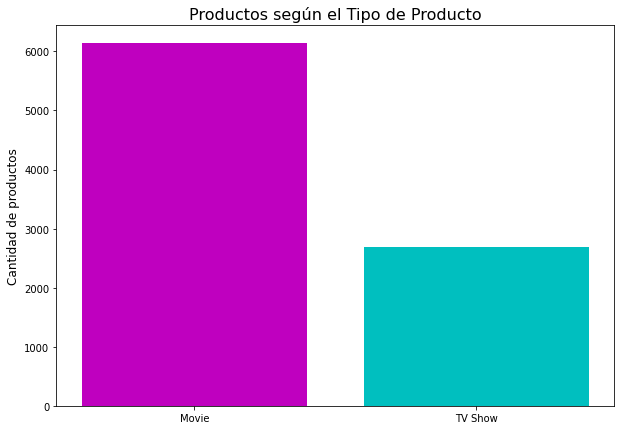

In [ ]:
fig = plt.figure(figsize=(10, 7))
y = tabla_tipo['title']
x = tabla_tipo.index
plt.bar(x, y, color=["m", 'c'])
plt.title("Productos según el Tipo de Producto", size=16)
plt.ylabel("Cantidad de productos", size=12)
plt.show()

Comentario: En el catálogo, predominan las películas en relación con las series de TV.

#### 2. Evaluación de géneros  en el dataset

Generamos un gráfico para ver la distribución de frecuencias en los géneros disponibles dentro del catálogo de Netflix usando el dataset.

[A conclusión](#scrollTo=q7ppUWSYpA7A)

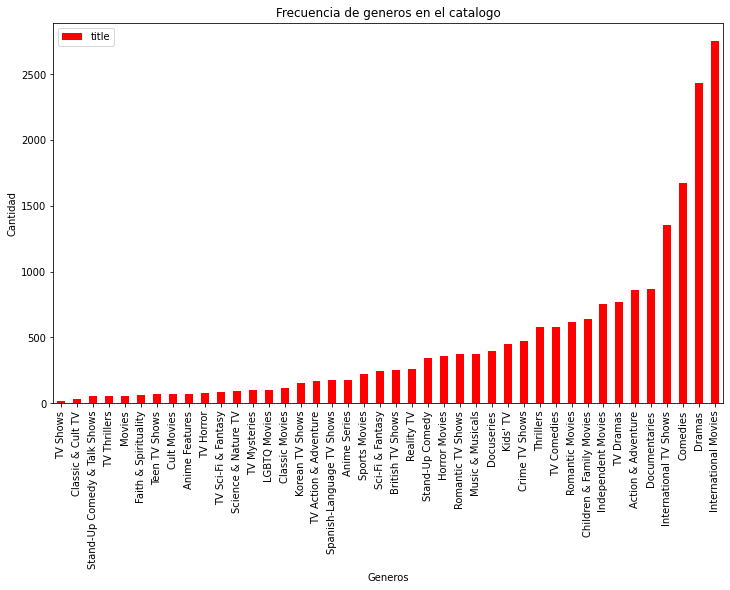

In [ ]:
frec_gen = (df_genero[['listed_in', 'title']].groupby('listed_in').count()).sort_values(['title'],ascending=True)
frec_gen.plot(kind='bar', title='Frecuencia de generos en el catalogo', ylabel='Cantidad', xlabel='Generos', color="r", figsize=(12, 7))

Comentario: En el gráfico se puede observar la predominancia de los géneros “International Movies”, “Dramas” y “Comedies”, por lo contrario también podemos ver que “Classic & Cult TV” es el género con menos producciones.

a. Series (`TV Show`) por genero

In [ ]:
tabla_genero_s = df_genero[df_genero['type'] == 'TV Show']
tabla_genero_s = tabla_genero_s[['listed_in', 'title']].groupby('listed_in').count()
tabla_genero_s = tabla_genero_s.sort_values(['title'],ascending=False)
tabla_genero_s

,title
listed_in,
International TV Shows,1354
TV Dramas,765
TV Comedies,582
Crime TV Shows,471
Kids' TV,451
Docuseries,396
Romantic TV Shows,371
Reality TV,257
British TV Shows,254


b. Peliculas (`Movies`) por Género

In [ ]:
tabla_genero_p = df_genero[df_genero['type'] == 'Movie']
tabla_genero_p = tabla_genero_p[['listed_in', 'title']].groupby('listed_in').count()
tabla_genero_p = tabla_genero_p.sort_values(['title'],ascending=False)
tabla_genero_p

,title
listed_in,
International Movies,2753
Dramas,2429
Comedies,1675
Documentaries,870
Action & Adventure,859
Independent Movies,757
Children & Family Movies,642
Romantic Movies,616
Thrillers,577


Text(0.5, 0.98, 'Productos Por Géneros')

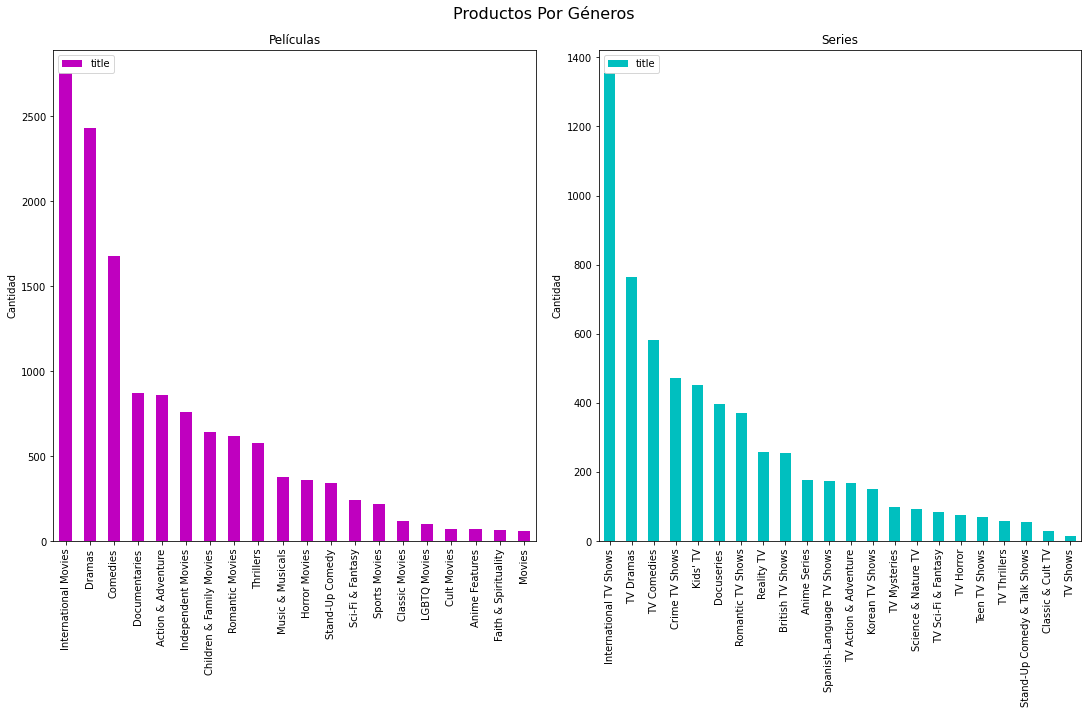

In [ ]:
fig = plt.figure(figsize=(10, 5), constrained_layout=True)
spec = fig.add_gridspec(ncols=2, nrows=1)
plt.tight_layout()

ax0 = fig.add_subplot(spec[0, 0])
tabla_genero_p.plot(kind='bar', title='Películas', ylabel='Cantidad',
         figsize=(15, 10), color ='m', xlabel = ' ' , ax = ax0)
plt.legend(loc='upper left')

ax1 = fig.add_subplot(spec[0, 1])
tabla_genero_s.plot(kind='bar', title='Series', ylabel='Cantidad',
         figsize=(15, 10), color ='c', xlabel = ' ' , ax = ax1)
plt.legend(loc='upper left')

fig.suptitle('Productos Por Géneros', size = 16)

#### 3. Evaluación del total de peliculas y series en el dataset a lo largo de lo años



[A conclusión](#scrollTo=q7ppUWSYpA7A)

Focalizamos el análisis en los últimos 5 años (principalmente para ver evolución con la pandemia) usando la función `separar_año()`

Presentamos la curva de títulos por año global y su caída a posteriori del 2019

In [ ]:
def separar_año(inicio, fin, df):
  mask = (df["date_added"] <= (fin)) & (df["date_added"] >= (inicio))
  df_raw_año = df[mask]
  return df_raw_año

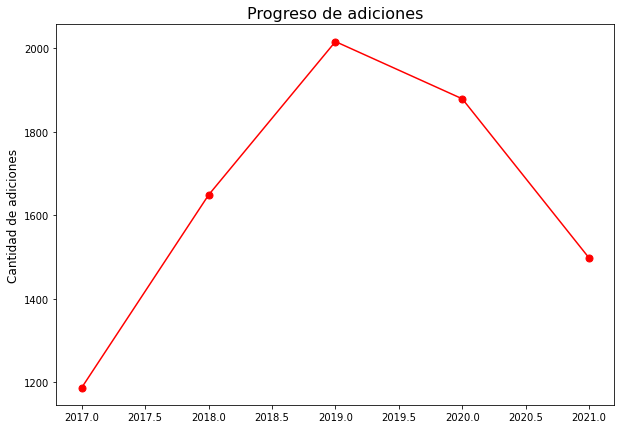

In [ ]:
fig = plt.figure(figsize=(10, 7))
y = ((separar_año("2017-01-01","2017-12-31", df_raw2)["title"].count()), (separar_año("2018-01-01","2018-12-31", df_raw2)["title"].count()), (separar_año("2019-01-01","2019-12-31", df_raw2)["title"].count()), (separar_año("2020-01-01","2020-12-31", df_raw2)["title"].count()), (separar_año("2021-01-01","2021-12-31", df_raw2)["title"].count()))
x = (2017, 2018 , 2019, 2020, 2021)
plt.plot(x, y, marker="o", markersize=7, color="r")
plt.title("Progreso de adiciones", size=16)
plt.ylabel("Cantidad de adiciones", size=12)
plt.show()

Evaluamos la evolución anual discrimando por películas y series.

Creamos una columna que contenga el año de la columna `date_added`

In [ ]:
df_raw2['anio'] = pd.DatetimeIndex(df_raw2['date_added']).year
year = df_raw2['anio']
year

0       2021.0
1       2021.0
2       2021.0
3       2021.0
4       2021.0
         ...  
8812    2022.0
8813    2022.0
8814    2022.0
8815    2022.0
8816    2022.0
Name: anio, Length: 8817, dtype: float64

Armamos la tabla para las películas

In [ ]:
tabla_anio_m = df_raw2[df_raw2['type'] == 'Movie']
tabla_anio_m = tabla_anio_m[['anio', 'title']].groupby('anio').count()
tabla_anio_m = tabla_anio_m.sort_values(['anio'],ascending=False)
tabla_anio_m

,title
anio,
2022.0,4
2021.0,993
2020.0,1284
2019.0,1424
2018.0,1237
2017.0,839
2016.0,253
2015.0,56
2014.0,19


Armamos la tabla para las series

In [ ]:
tabla_anio_s = df_raw2[df_raw2['type'] == 'TV Show']
tabla_anio_s = tabla_anio_s[['anio', 'title']].groupby('anio').count()
tabla_anio_s = tabla_anio_s.sort_values(['anio'],ascending=False)
tabla_anio_s

,title
anio,
2022.0,6
2021.0,505
2020.0,595
2019.0,592
2018.0,412
2017.0,349
2016.0,176
2015.0,26
2014.0,5


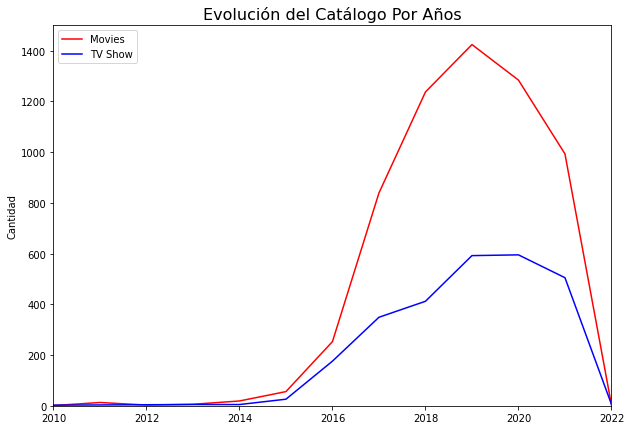

In [ ]:
fig = plt.figure(figsize=(10, 7))

x1 = tabla_anio_m.index
x2 = tabla_anio_s.index
y1 = tabla_anio_m['title']
y2 = tabla_anio_s['title']

plt.plot(x1, y1, 'r', x2, y2, 'b')
plt.xlim(2010, 2022)
plt.ylim(0, 1500)
plt.ylabel('Cantidad')
plt.legend(['Movies', 'TV Show'], loc = 'upper left')
plt.title('Evolución del Catálogo Por Años', size = 16)


plt.show()

#### 4. Evaluación del total de peliculas y series en el dataset según el año de producción del producto (`release_year`)

[A conclusión](#scrollTo=q7ppUWSYpA7A)

In [ ]:
tabla_anio_prod = df_raw2[['release_year', 'title']].groupby('release_year').count()
tabla_anio_prod['title']

release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     954
2021     600
Name: title, Length: 74, dtype: int64

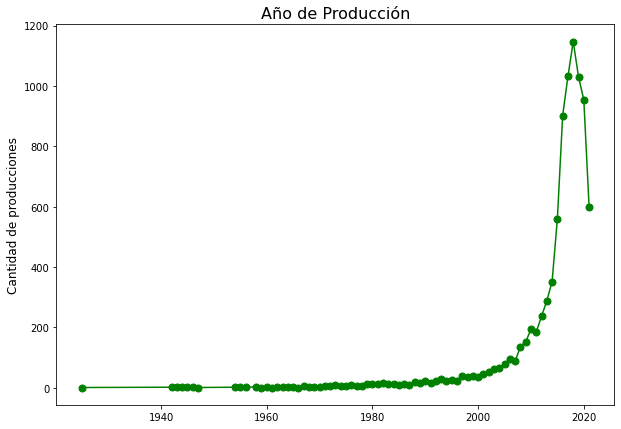

In [ ]:
fig = plt.figure(figsize=(10, 7))
y = tabla_anio_prod['title']
x = tabla_anio_prod.index
plt.plot(x, y, marker="o", markersize=7, color="g")
plt.title("Año de Producción", size=16)
plt.ylabel("Cantidad de producciones", size=12)
plt.show()

Comentario: Se visualiza un pico en el año 2019 con un pronunciado descenso coincidente con la el inicio de la pandemia COVID-19.

#### 5. Duración de peliculas por genero


[A conclusión](#scrollTo=q7ppUWSYpA7A)


Trabajamos con el df generado con la función`spilt_unpivot()`

In [ ]:
df_movies_g.head() # este df es el resultado de split_unpivot()

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_min
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90
1,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",No Data,2021-09-24,2021,PG,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91
2,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,Dramas,"On a photo shoot in Ghana, an American model s...",125
2,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,Independent Movies,"On a photo shoot in Ghana, an American model s...",125
2,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,International Movies,"On a photo shoot in Ghana, an American model s...",125


Tabulamos los resultados y generamos el gráfico de barras

In [ ]:
out = df_movies_g[['listed_in','duration_min']].groupby('listed_in').mean()
out = out.sort_values(by='duration_min', ascending= False)

In [ ]:
out

,duration_min
listed_in,
Classic Movies,118.646552
Action & Adventure,113.515716
Dramas,113.052285
Romantic Movies,110.573052
International Movies,110.355249
Thrillers,107.166378
Music & Musicals,106.125333
Sci-Fi & Fantasy,106.016461
Faith & Spirituality,105.584615


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

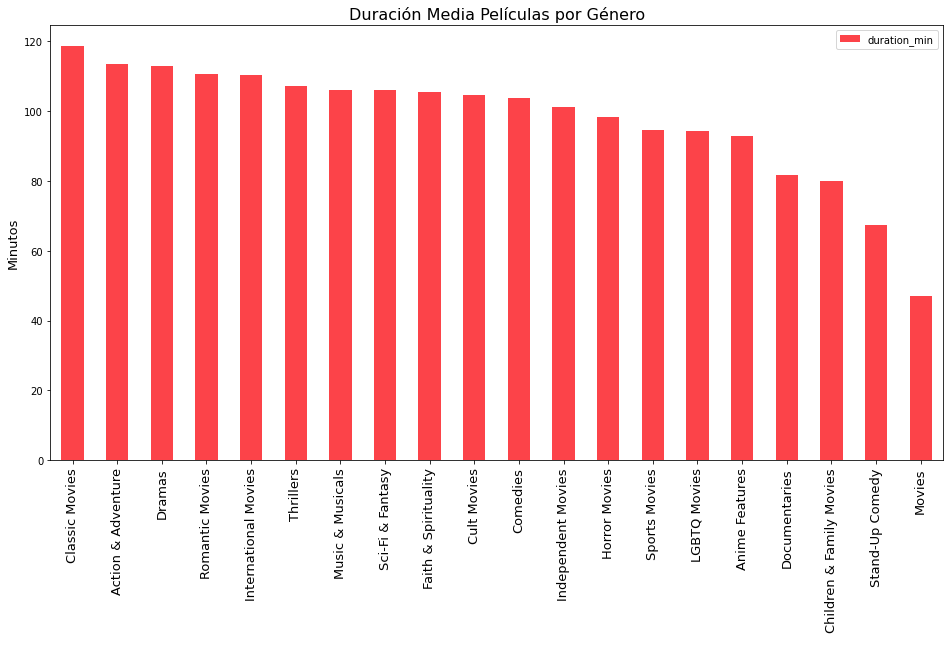

In [ ]:
out.plot.bar(figsize =(16,8), color='#FC4349', xlabel = ' ' ,)
plt.title('Duración Media Películas por Género', size = 16)
plt.ylabel('Minutos', size = 13)

plt.xticks(size = 13, rotation = 90)

#### 6. Géneros mas representativos en lo últimos 5 años

[A conclusión](#scrollTo=q7ppUWSYpA7A)


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

<Figure size 576x720 with 0 Axes>

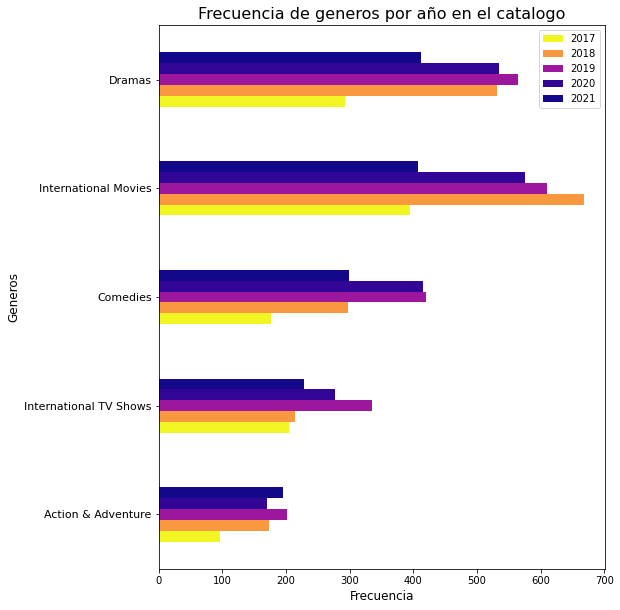

In [ ]:
df_genero['year_added'] = pd.DatetimeIndex(df_genero['date_added']).year
df_generos_anio = df_genero[['year_added','listed_in','show_id']].groupby(['year_added','listed_in']).count()
df_generos_anio.columns = ['show_id']
df_generos_anio = df_generos_anio.reset_index()
df_generos_anio2 = df_generos_anio.pivot(index='listed_in', columns='year_added', values='show_id')
df_generos_anio2.columns = ['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022']
df_generos_anio2 = df_generos_anio2.reset_index()
df_generos_anio2['2017'] = df_generos_anio2['2017'].fillna(0)
df_generos_anio2['2018'] = df_generos_anio2['2018'].fillna(0)
df_generos_anio2['2019'] = df_generos_anio2['2019'].fillna(0)
df_generos_anio2['2020'] = df_generos_anio2['2020'].fillna(0)
df_generos_anio2['2021'] = df_generos_anio2['2021'].fillna(0)
df_generos_anio3 = df_generos_anio2[['listed_in','2017','2018','2019','2020','2021']]
df_generos_anio3 = df_generos_anio3.sort_values(by = ['2021'])
df_generos_anio4 = df_generos_anio3.tail(5)

fig = plt.figure(figsize=(8,10))
ax = df_generos_anio4.plot.barh(x='listed_in',figsize=(8,10),  color=["#F1F521","#F9983F","#9C179E" ,"#330596","#13078A" ])
plt.title("Frecuencia de generos por año en el catalogo", size=16)
plt.margins(y=0)
plt.xlabel("Frecuencia", size =12)
plt.ylabel("Generos", size =12)
plt.yticks(size =11)

---
## Conclusión

Del análisis del catálogo de Netflix se encuentran dós tipos de productos, las películas (`Movies`) y las series de TV (`TV Show`) siendo el producto más frecuentemente hallado el de las películas ([Fig 1](#scrollTo=Jforgg4Irt5i)). 

Respecto de la distribución de frecuencias en los géneros disponibles dentro del catálogo de Netflix ([Fig 2](#scrollTo=YbFaCAEdlv8U)) se puede observar la predominancia de los géneros “International Movies”, “Dramas” y “Comedias”, por lo contrario también podemos ver que “Classic & Cult TV” es el género con menos producciones. Vemos que tanto en películas como series los géneros más frecuentes coinciden en ser las producciones internacionales, dramas y comedias. 

En relación a la evolución de la cantidad de peliculas y series ofrecidas en el catálogo de Netflx a lo largo de lo años ([Fig 3](#scrollTo=zHlIT1AJmzUT)) vimos un incremento para ambos tipos de productos con un pico en el 2019 y coincidente con el inicio de la pandemia COVID-19 un descenso abrupto de nuevos títulos. 

En marzo de 2011, Netflix comenzó a adquirir contenido original para su servicio de suscripción de streaming, comenzando con el drama político de una hora House of Cards, que se estrenó en febrero de 2013. Al analizar por año de producción, vemos que luego de un pico en el 2019 se observa un brusco descenso de las producciones realizadas. ([Fig 4](#scrollTo=CKNBZCdqsHoR))

Al evaluar la duración de peliculas por genero, vimos que en promedio 'Classic Movies', 'Action & Adventure' y 'Dramas' son las producciones con más de 110 minutos en promedio, el catálogo incluye títulos con apenas unos minutos de duración correspondientes a cortometrajes. ([Fig 5](#scrollTo=K36GIDerqsmC))

El catálogo de Netflix ofrece la posibilidad de búsqueda por género con hasta tres palabras claves tanto para peliculas como para series. Si bien a lo largo de los años la proporción de títulos para cada tipo de producto se mantuvo similar, durante período pandémico se observó un cambio en el patrón de títulos incluidos en el catálogo. 

Analizando la cantidad de publicaciones por año y por genero podemos observar varios patrones;  en el 2018 aumentó en todos los generos versus el año anterior, y en el 2020 disminuyó vs el año anterior, en el 2019 aumentó para todos los generos salvo para International Movies, y finalmente para el 2021 disminuye salvo el genero de Action & Adventure ([Fig 6](#scrollTo=5f6owHKoJTIC)).

Netflix como plataforma de streaming ofrece un catálogo extenso de películas y series adaptando sus conetnidos de acuerdo a la demanda de la audiencia y condiciones excepcionales como ha sido la pandemia COVID-19 que se extendión del 2020 al 2021.

---
## Almacenamiento de resultados

In [ ]:
df_resultado_final = pd.DataFrame(df_raw2)
df_resultado_final.to_csv("./sample_data/df_resultado_final.csv")
df_genero = pd.DataFrame(df_genero)
df_genero.to_csv("./sample_data/df_genero.csv")